In [1]:
import numpy as np
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
from math import exp, sqrt, fabs, pow, log, log10
from scipy.integrate import simps, quad



<IPython.core.display.Javascript object>


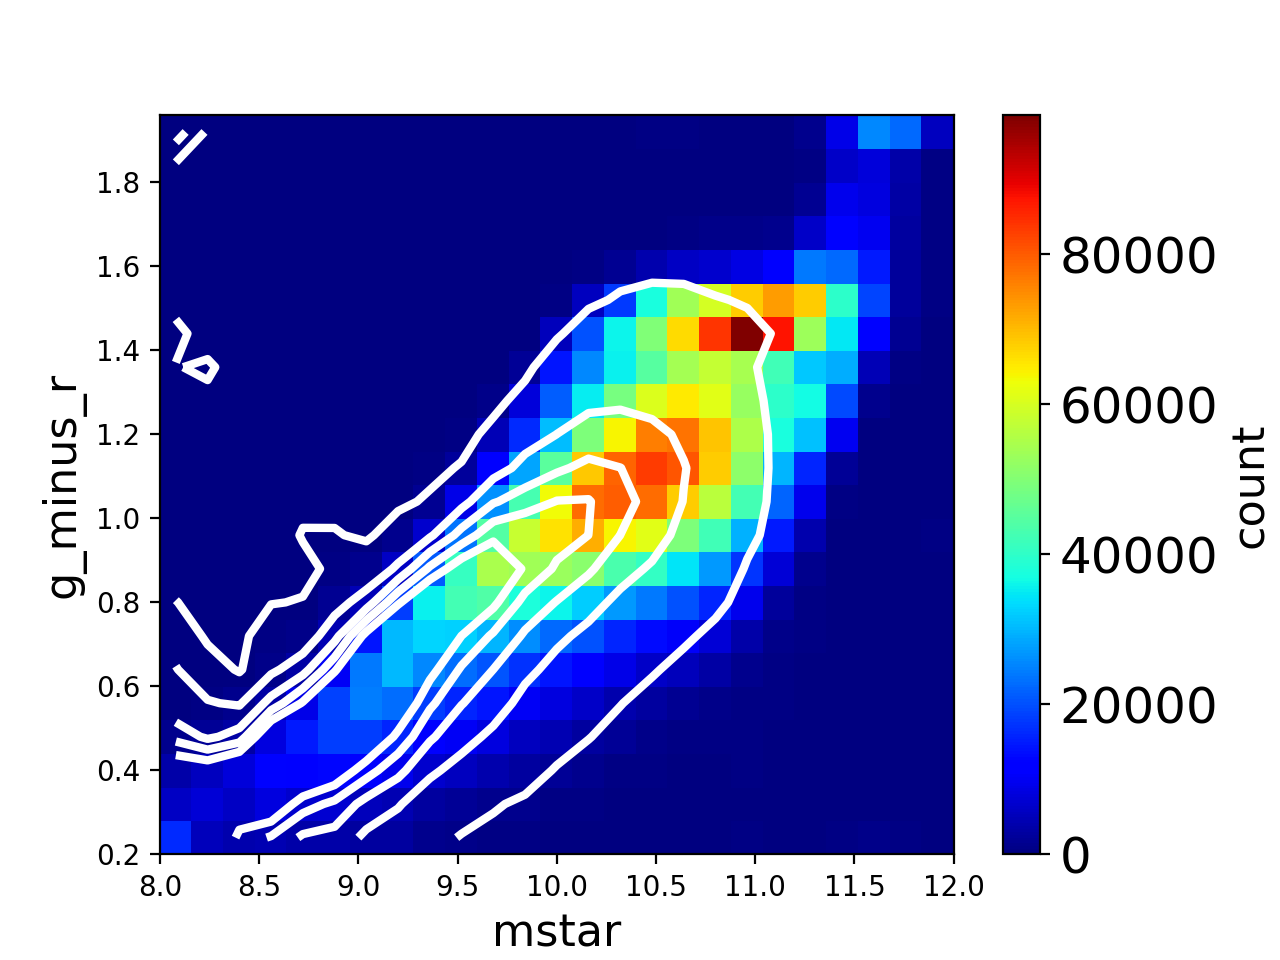

Total counts is 6.101944e+06
1292.2682215553177


In [2]:
prefix = 'results/n1p5_lmin43p0_mbhsigma/'

hist_type = "gals"
axis1 = "mstar"
axis2 = "g_minus_r"

zmax = 110000

plt.close()

#filename = "backup_histograms/" + hist_type + '_' +axis1 + '_' + axis2 + '.hist'
filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')

hist = np.loadtxt(filename,skiprows=2)
#print(hist.shape)

#hist = hist.transpose()

# flat or gauraud                                                                          
plt.pcolormesh(grid1_mesh,grid2_mesh,hist ,shading='flat',cmap="jet")  

                                                                                       
cbar = plt.colorbar()                                                                          
max_count = np.amax(hist)                                                       
min_count = np.amin(hist)                                                       

#plt.clim(0, max_count)
#plt.clim(0,zmax)
                                                                        
cbar.ax.tick_params(labelsize=18)                                                          
cbar.set_label('count',fontsize=16)                                    
                                                                                           
if (switched_order == 0):                                         
    plt.xlabel(axis1,fontsize=16)                                
    plt.ylabel(axis2,fontsize=16) 
if (switched_order == 1):                                         
    plt.xlabel(axis2,fontsize=16)                                
    plt.ylabel(axis1,fontsize=16) 
                                                                                           
print("Total counts is %e" % hist.sum())

hist_type = "vol_disrupt"

filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

# contours want bin-centers, non bin-edges like pcolormesh
grid1 = np.array([0.5 * (grid1[i] + grid1[i+1]) for i in range(len(grid1) - 1)])
grid2 = np.array([0.5 * (grid2[i] + grid2[i+1]) for i in range(len(grid2) - 1)])
                 

#why do I need to cut down the size by 1?
# I think you need to convert to cell-centers
grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')
#grid1_mesh,grid2_mesh= np.meshgrid(grid1[1::],grid2[1::],indexing='ij')

hist2 = np.loadtxt(filename,skiprows=2)

#hist = hist.transpose()


max_count = np.amax(hist2)                                                       
min_count = np.amin(hist2) 
contour_levels = [0.5,3.5,6.5,9.5,12.5] # good for vol_disrupt
#contour_levels = [0.1 * max_count,0.3 * max_count,0.5 * max_count, 0.7 * max_count,  0.9 * max_count]
plt.contour(grid1_mesh,grid2_mesh,hist2,contour_levels,colors='w',linewidths=3)

print (hist2.sum())
                                                                                           
#plt.show()      


<IPython.core.display.Javascript object>


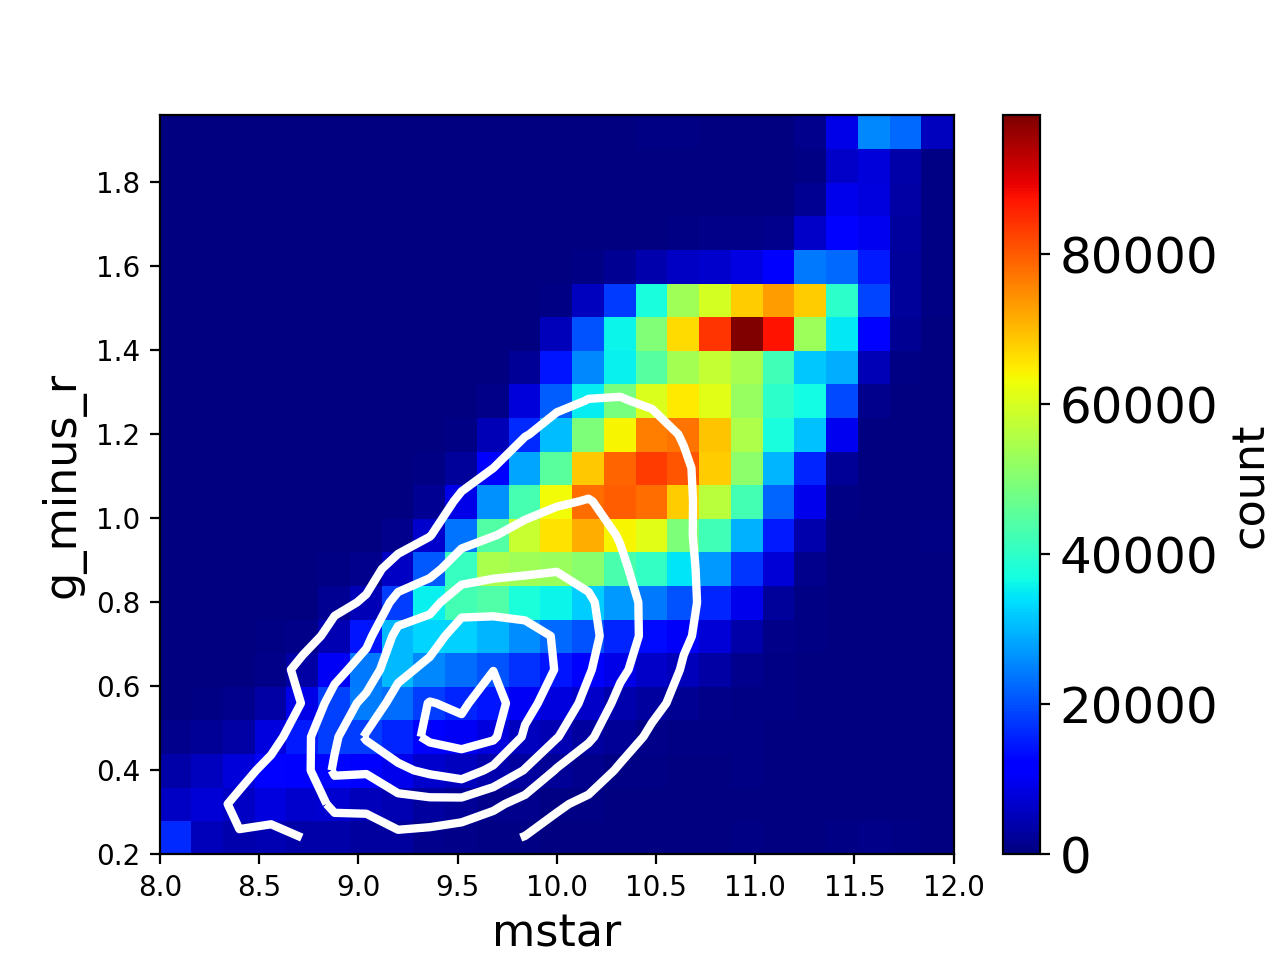

Total counts is 6.101944e+06
50.529512529475184


In [3]:
prefix = 'results/n1p5_lmin43p0_mbhsigma/'

hist_type = "gals"
axis1 = "mstar"
axis2 = "g_minus_r"

zmax = 110000

plt.close()

#filename = "backup_histograms/" + hist_type + '_' +axis1 + '_' + axis2 + '.hist'
filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')

hist = np.loadtxt(filename,skiprows=2)
#print(hist.shape)

#hist = hist.transpose()

# flat or gauraud                                                                          
plt.pcolormesh(grid1_mesh,grid2_mesh,hist ,shading='flat',cmap="jet")  

                                                                                       
cbar = plt.colorbar()                                                                          
max_count = np.amax(hist)                                                       
min_count = np.amin(hist)                                                       

#plt.clim(0, max_count)
#plt.clim(0,zmax)
                                                                        
cbar.ax.tick_params(labelsize=18)                                                          
cbar.set_label('count',fontsize=16)                                    
                                                                                           
if (switched_order == 0):                                         
    plt.xlabel(axis1,fontsize=16)                                
    plt.ylabel(axis2,fontsize=16) 
if (switched_order == 1):                                         
    plt.xlabel(axis2,fontsize=16)                                
    plt.ylabel(axis1,fontsize=16) 
                                                                                           
print("Total counts is %e" % hist.sum())

hist_type = "detected_disrupt"

filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

# contours want bin-centers, non bin-edges like pcolormesh
grid1 = np.array([0.5 * (grid1[i] + grid1[i+1]) for i in range(len(grid1) - 1)])
grid2 = np.array([0.5 * (grid2[i] + grid2[i+1]) for i in range(len(grid2) - 1)])
                 

#why do I need to cut down the size by 1?
# I think you need to convert to cell-centers
grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')
#grid1_mesh,grid2_mesh= np.meshgrid(grid1[1::],grid2[1::],indexing='ij')

hist2 = np.loadtxt(filename,skiprows=2)

#hist = hist.transpose()


max_count = np.amax(hist2)                                                       
min_count = np.amin(hist2) 
contour_levels = np.array([0.5,3.5,6.5,9.5,12.5])/100. # good for lmin 42.
#contour_levels = np.array([0,0.5,3.5,6.5,9.5,12.5])/20. # good for lmin 43
#contour_levels = np.array([0.01,3.01,6.01,9.01,12.01])/10.
contour_levels = [0.1 * max_count,0.3 * max_count,0.5 * max_count, 0.7 * max_count,  0.9 * max_count]
plt.contour(grid1_mesh,grid2_mesh,hist2,contour_levels,colors='w',linewidths=3)

print (hist2.sum())
                                                                                           
#plt.show()      


<IPython.core.display.Javascript object>


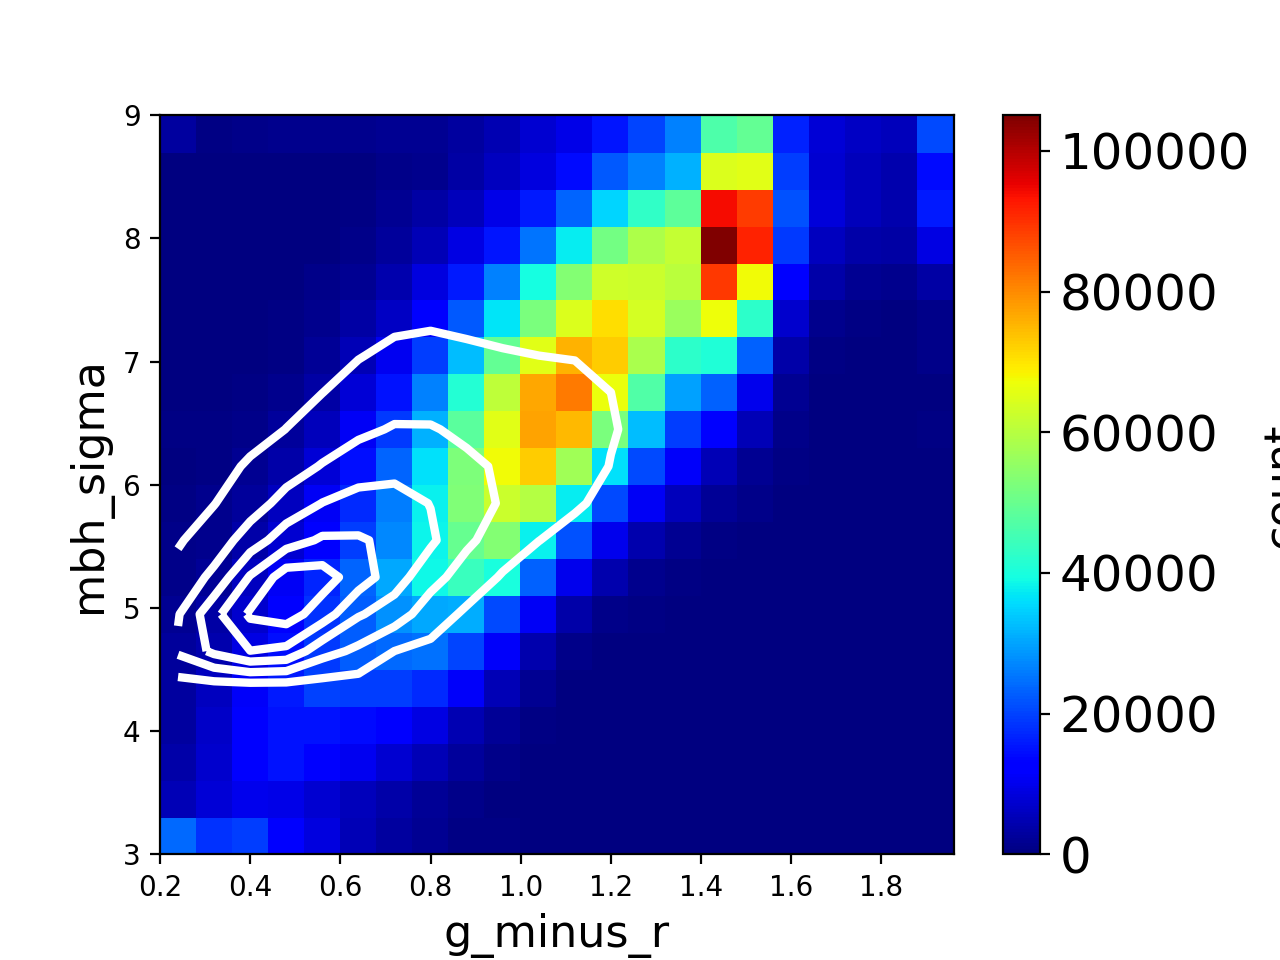

Total counts is 6.101944e+06
50.529513883196


In [4]:
prefix = 'results/n1p5_lmin43p0_mbhsigma/'

hist_type = "gals"
axis1 = "g_minus_r"
axis2 = "mbh_sigma"

zmax = 110000

plt.close()

filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'
#filename = hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')

hist = np.loadtxt(filename,skiprows=2)
#print(hist.shape)

#hist = hist.transpose()

# flat or gauraud                                                                          
plt.pcolormesh(grid1_mesh,grid2_mesh,hist ,shading='flat',cmap="jet")  

                                                                                       
cbar = plt.colorbar()                                                                          
max_count = np.amax(hist)                                                       
min_count = np.amin(hist)                                                       

#plt.clim(0, max_count)
#plt.clim(0,zmax)
                                                                        
cbar.ax.tick_params(labelsize=18)                                                          
cbar.set_label('count',fontsize=16)                                    
                                                                                           
if (switched_order == 0):                                         
    plt.xlabel(axis1,fontsize=16)                                
    plt.ylabel(axis2,fontsize=16) 
if (switched_order == 1):                                         
    plt.xlabel(axis2,fontsize=16)                                
    plt.ylabel(axis1,fontsize=16) 
                                                                                           
print("Total counts is %e" % hist.sum())

hist_type = "detected_disrupt"

filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

# contours want bin-centers, non bin-edges like pcolormesh
grid1 = np.array([0.5 * (grid1[i] + grid1[i+1]) for i in range(len(grid1) - 1)])
grid2 = np.array([0.5 * (grid2[i] + grid2[i+1]) for i in range(len(grid2) - 1)])
                 

#why do I need to cut down the size by 1?
# I think you need to convert to cell-centers
grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')
#grid1_mesh,grid2_mesh= np.meshgrid(grid1[1::],grid2[1::],indexing='ij')

hist2 = np.loadtxt(filename,skiprows=2)

#hist = hist.transpose()


max_count = np.amax(hist2)                                                       
min_count = np.amin(hist2) 
#contour_levels = np.array([0.5,3.5,6.5,9.5,12.5])/20.
#contour_levels = np.array([0.01,3.01,6.01,9.01,12.01])/50.
#contour_levels = [0.3175 * max_count,0.635 * max_count,0.9525 * max_count]
contour_levels = [0.1 * max_count,0.3 * max_count,0.5 * max_count, 0.7 * max_count,  0.9 * max_count]
plt.contour(grid1_mesh,grid2_mesh,hist2,contour_levels,colors='w',linewidths=3)


print (hist2.sum())                                                         
#plt.show()   

<IPython.core.display.Javascript object>


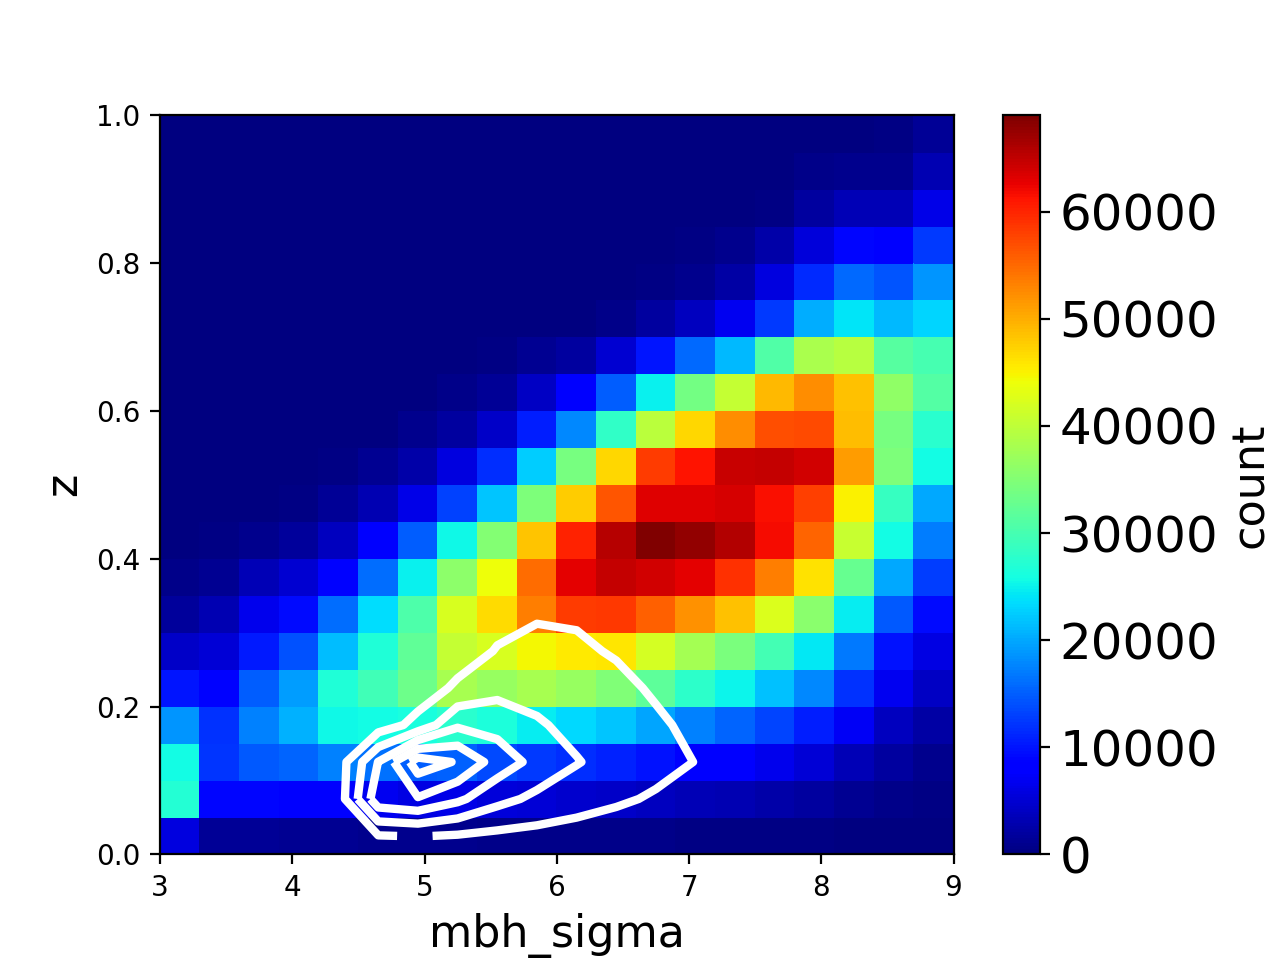

Total counts is 6.101944e+06
50.52951272610651


In [5]:
prefix = 'results/n1p5_lmin43p0_mbhsigma/'

hist_type = "gals"
axis1 = "mbh_sigma"
axis2 = "z"

zmax = 110000

plt.close()

filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'
#filename = hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')

hist = np.loadtxt(filename,skiprows=2)
#print(hist.shape)

#hist = hist.transpose()

# flat or gauraud                                                                          
plt.pcolormesh(grid1_mesh,grid2_mesh,hist ,shading='flat',cmap="jet")  

                                                                                       
cbar = plt.colorbar()                                                                          
max_count = np.amax(hist)                                                       
min_count = np.amin(hist)                                                       

#plt.clim(0, max_count)
#plt.clim(0,zmax)
                                                                        
cbar.ax.tick_params(labelsize=18)                                                          
cbar.set_label('count',fontsize=16)                                    
                                                                                           
if (switched_order == 0):                                         
    plt.xlabel(axis1,fontsize=16)                                
    plt.ylabel(axis2,fontsize=16) 
if (switched_order == 1):                                         
    plt.xlabel(axis2,fontsize=16)                                
    plt.ylabel(axis1,fontsize=16) 
                                                                                           
print("Total counts is %e" % hist.sum())

hist_type = "detected_disrupt"

filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

# contours want bin-centers, non bin-edges like pcolormesh
grid1 = np.array([0.5 * (grid1[i] + grid1[i+1]) for i in range(len(grid1) - 1)])
grid2 = np.array([0.5 * (grid2[i] + grid2[i+1]) for i in range(len(grid2) - 1)])
                 

#why do I need to cut down the size by 1?
# I think you need to convert to cell-centers
grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')
#grid1_mesh,grid2_mesh= np.meshgrid(grid1[1::],grid2[1::],indexing='ij')

hist2 = np.loadtxt(filename,skiprows=2)

#hist = hist.transpose()


max_count = np.amax(hist2)                                                       
min_count = np.amin(hist2) 
#contour_levels = np.array([0.5,3.5,6.5,9.5,12.5])/20.
#contour_levels = np.array([0.5,3.5,6.5,9.5,12.5])
#contour_levels = [0.3175 * max_count,0.635 * max_count,0.9525 * max_count]
contour_levels = [0.1 * max_count,0.3 * max_count,0.5 * max_count, 0.7 * max_count,  0.9 * max_count]
plt.contour(grid1_mesh,grid2_mesh,hist2,contour_levels,colors='w',linewidths=3)

print (hist2.sum())
                                                                                           
#plt.show()   

<IPython.core.display.Javascript object>


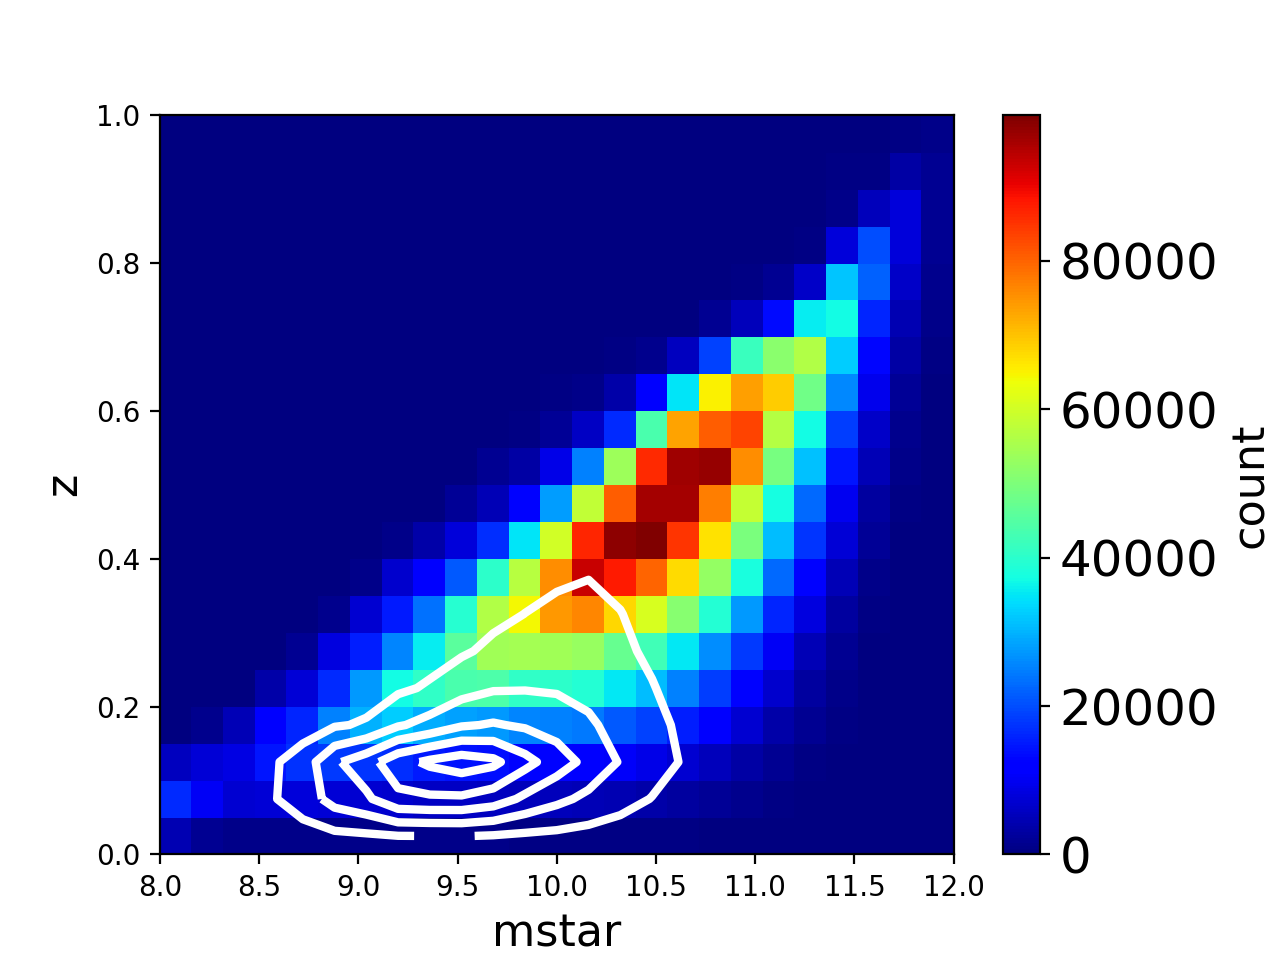

Total counts is 6.101944e+06
50.529512268825044


In [6]:
prefix = 'results/n1p5_lmin43p0_mbhsigma/'

hist_type = "gals"
axis1 = "z"
axis2 = "mstar"

zmax = 110000

plt.close()

filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'
#filename = hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')

hist = np.loadtxt(filename,skiprows=2)
#print(hist.shape)

#hist = hist.transpose()

# flat or gauraud                                                                          
plt.pcolormesh(grid1_mesh,grid2_mesh,hist ,shading='flat',cmap="jet")  

                                                                                       
cbar = plt.colorbar()                                                                          
max_count = np.amax(hist)                                                       
min_count = np.amin(hist)                                                       

#plt.clim(0, max_count)
#plt.clim(0,zmax)
                                                                        
cbar.ax.tick_params(labelsize=18)                                                          
cbar.set_label('count',fontsize=16)                                    
                                                                                           
if (switched_order == 0):                                         
    plt.xlabel(axis1,fontsize=16)                                
    plt.ylabel(axis2,fontsize=16) 
if (switched_order == 1):                                         
    plt.xlabel(axis2,fontsize=16)                                
    plt.ylabel(axis1,fontsize=16) 
                                                                                           
print("Total counts is %e" % hist.sum())

hist_type = "detected_disrupt"

filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

# contours want bin-centers, non bin-edges like pcolormesh
grid1 = np.array([0.5 * (grid1[i] + grid1[i+1]) for i in range(len(grid1) - 1)])
grid2 = np.array([0.5 * (grid2[i] + grid2[i+1]) for i in range(len(grid2) - 1)])
                 

#why do I need to cut down the size by 1?
# I think you need to convert to cell-centers
grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')
#grid1_mesh,grid2_mesh= np.meshgrid(grid1[1::],grid2[1::],indexing='ij')

hist2 = np.loadtxt(filename,skiprows=2)

#hist = hist.transpose()


max_count = np.amax(hist2)                                                       
min_count = np.amin(hist2) 
contour_levels = np.array([0.5,3.5,6.5,9.5,12.5])/50.
#contour_levels = np.array([0.5,3.5,6.5,9.5,12.5])/10.
#contour_levels = np.array([0.01,3.01,6.01,9.01,12.01])/10.
contour_levels = [0.1 * max_count,0.3 * max_count,0.5 * max_count, 0.7 * max_count,  0.9 * max_count]
plt.contour(grid1_mesh,grid2_mesh,hist2,contour_levels,colors='w',linewidths=3)

print (hist2.sum())
                                                                                           
#plt.show()

<IPython.core.display.Javascript object>


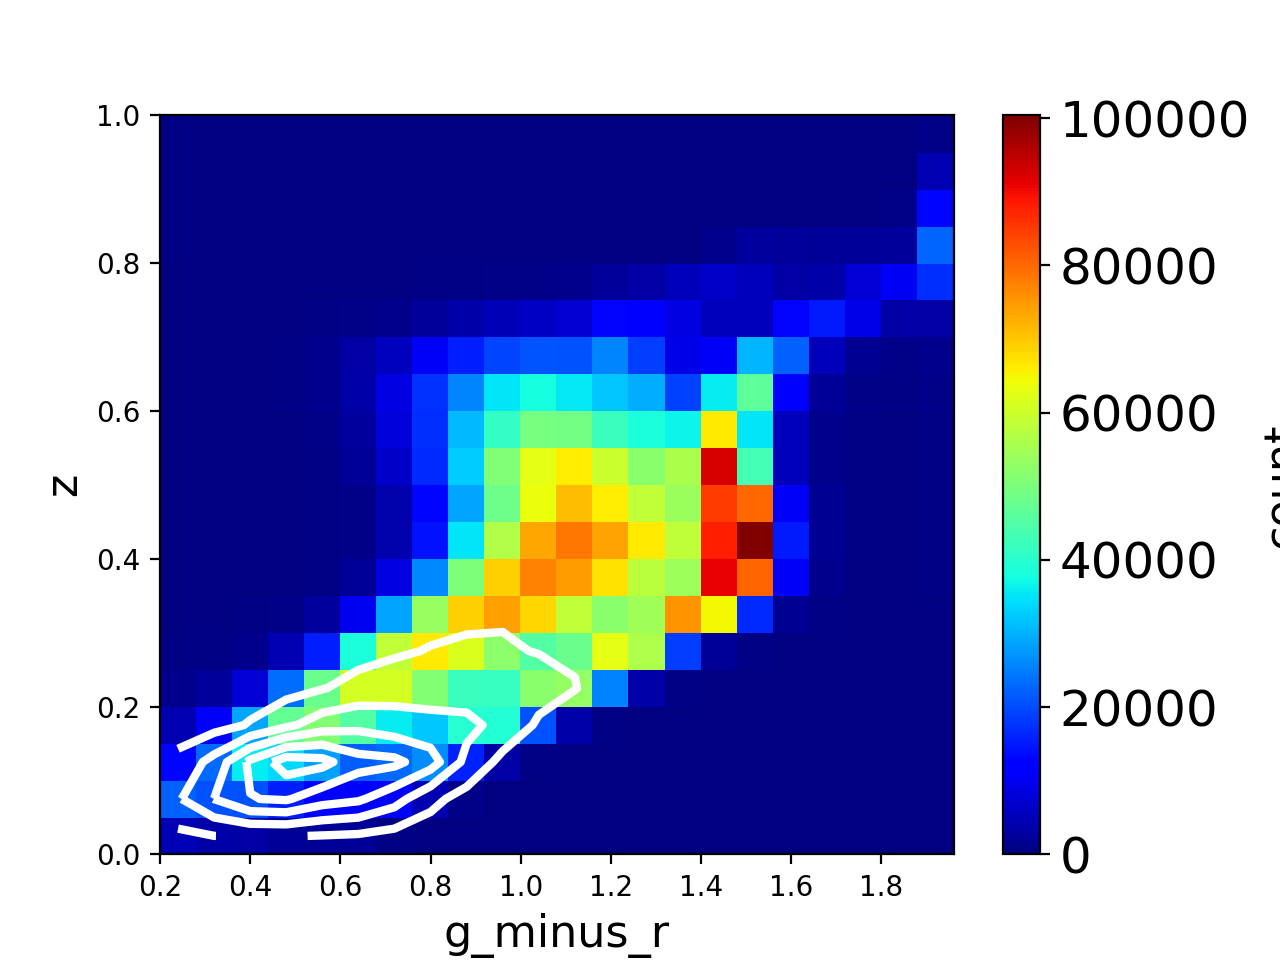

Total counts is 6.101944e+06
50.52951134434007


In [7]:
prefix = 'results/n1p5_lmin43p0_mbhsigma/'

hist_type = "gals"
axis1 = "z"
axis2 = "g_minus_r"

zmax = 110000

plt.close()

filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'
#filename = hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')

hist = np.loadtxt(filename,skiprows=2)
#print(hist.shape)

#hist = hist.transpose()

# flat or gauraud                                                                          
plt.pcolormesh(grid1_mesh,grid2_mesh,hist ,shading='flat',cmap="jet")  

                                                                                       
cbar = plt.colorbar()                                                                          
max_count = np.amax(hist)                                                       
min_count = np.amin(hist)                                                       

#plt.clim(0, max_count)
#plt.clim(0,zmax)
                                                                        
cbar.ax.tick_params(labelsize=18)                                                          
cbar.set_label('count',fontsize=16)                                    
                                                                                           
if (switched_order == 0):                                         
    plt.xlabel(axis1,fontsize=16)                                
    plt.ylabel(axis2,fontsize=16) 
if (switched_order == 1):                                         
    plt.xlabel(axis2,fontsize=16)                                
    plt.ylabel(axis1,fontsize=16) 
                                                                                           
print("Total counts is %e" % hist.sum())

hist_type = "detected_disrupt"

filename = prefix + hist_type + '_' +axis1 + '_' + axis2 + '.hist'

switched_order = 0

try:
    grid1 = np.genfromtxt(filename, max_rows = 1)
except OSError:
    try:
        filename = prefix + hist_type + '_' + axis2 + '_' + axis1 + '.hist'
        grid1 = np.genfromtxt(filename, max_rows = 1)
        switched_order = 1
    except OSError:
        print ("error, check names")

        
grid2 = np.genfromtxt(filename, skip_header=1, max_rows = 1)

# contours want bin-centers, non bin-edges like pcolormesh
grid1 = np.array([0.5 * (grid1[i] + grid1[i+1]) for i in range(len(grid1) - 1)])
grid2 = np.array([0.5 * (grid2[i] + grid2[i+1]) for i in range(len(grid2) - 1)])
                 

#why do I need to cut down the size by 1?
# I think you need to convert to cell-centers
grid1_mesh,grid2_mesh= np.meshgrid(grid1,grid2,indexing='ij')
#grid1_mesh,grid2_mesh= np.meshgrid(grid1[1::],grid2[1::],indexing='ij')

hist2 = np.loadtxt(filename,skiprows=2)

#hist = hist.transpose()


max_count = np.amax(hist2)                                                       
min_count = np.amin(hist2) 
contour_levels = np.array([0.5,3.5,6.5,9.5,12.5])/50.
#contour_levels = np.array([0.5,3.5,6.5,9.5,12.5])/10.
#contour_levels = np.array([0.01,3.01,6.01,9.01,12.01])/10.
#contour_levels = [0.3175 * max_count,0.635 * max_count,0.9525 * max_count]
contour_levels = [0.1 * max_count,0.3 * max_count,0.5 * max_count, 0.7 * max_count,  0.9 * max_count]
plt.contour(grid1_mesh,grid2_mesh,hist2,contour_levels,colors='w',linewidths=3)

print (hist2.sum())
                                                                                           
#plt.show()